# Northern Ireland (NI) Personal Independence Payment (PIP) Analysis

Plotting the number of registrations for disabilityt payments over time.

# Usage
Navigate to any section starting with *Configure:* and set the variables as needed for your notebook execution.

# Setup

In [9]:
from lib.utility_functions import local_ca_certificate_file_path, debug_this, Month, download_file, column_convert_object_to_string_in, remove_timestamp, print_full
import pandas as pd

## Configure: Debugging
The global variable below can be used to enable or disable debug messages.

In [10]:
debug_enabled = True
preview_only_enabled = False

In [11]:
def debug(item):
    debug_this(debug_enabled, item, preview_only_enabled)

## Disability Payment Registration Data

You can find this data at various locations, including: 
* here: https://www.communities-ni.gov.uk/articles/personal-independence-payment-statistics.

### Configure: Weekly Download File
1. The URL of the latest source file which changes weekly
2. The number of rows to read

In [12]:
raw_pip_url='https://www.communities-ni.gov.uk/system/files/publications/communities/personal-independence-payment-statistics-supplementary-tables-nov-2022.xlsx'
raw_pip_filepath='data/inbound/raw/nisra/pip/quarterly/pip_payments_upto_november_2022.xlsx'
rows_to_read = 78

In [13]:
download_file(raw_pip_url, raw_pip_filepath)

downloaded from: https://www.communities-ni.gov.uk/system/files/publications/communities/personal-independence-payment-statistics-supplementary-tables-nov-2022.xlsx


In [14]:
df_pip = pd.read_excel(raw_pip_filepath,  
                                  sheet_name='Table 1 - Registrations', 
                                  skiprows=2, 
                                  nrows=rows_to_read,
                                  usecols='A:H')
debug(df_pip)

,Month,Normal Rules \nNew Claims,Normal Rules \nReassessment,Normal Rules Total,SREL\nNew Claims,SREL\nReassessment,SREL Total,Total Claims Registered
0,2016-06-30,900,100,990,10,0,20,1010
1,2016-07-31,1880,1300,3180,20,10,40,3220
2,2016-08-31,2140,1490,3630,40,20,60,3700
3,2016-09-30,2090,1830,3920,30,20,50,3980
4,2016-10-31,2280,2090,4370,20,10,40,4400
...,...,...,...,...,...,...,...,...
73,2022-07-31,2120,350,2470,20,0,30,2500
74,2022-08-31,2710,410,3120,40,0,50,3170
75,2022-09-30,2910,390,3300,40,0,40,3340
76,2022-10-31,2740,390,3130,30,0,40,3170


## Terminology
* PIP = Personal Independence Payment
* SREL = Special Rules for End of Life

In [20]:
df_pip.rename(columns={
    "Normal Rules \nNew Claims":"Normal Rules New Claims", 
    "Normal Rules \nReassessment":"Normal Rules Reassessment",
    "SREL\nReassessment":"SREL Reassessment",
    "SREL\nNew Claims":"SREL New Claims"}, inplace=True
)

df_pip['Total New Claims Registered'] = df_pip['Normal Rules New Claims'] + df_pip['SREL New Claims']

df_pip['Month'] = df_pip['Month'].astype(str)
df_pip['Year Month'] = df_pip['Month'].str[:7]

df_pip['Total New Claims 24-month Rolling Average'] = df_pip['Total New Claims Registered'].rolling(24).mean()
df_pip['Total New Claims 12-month Rolling Average'] = df_pip['Total New Claims Registered'].rolling(12).mean()
df_pip['Total New Claims 6-month Rolling Average'] = df_pip['Total New Claims Registered'].rolling(6).mean()
df_pip['Total New Claims 3-month Rolling Average'] = df_pip['Total New Claims Registered'].rolling(3).mean()

debug(df_pip)

df_pip.to_pickle(f'data/outbound/disabilities/MonthlyDisabilityRegistrationsNov2022.pkl')

,Month,Normal Rules New Claims,Normal Rules Reassessment,Normal Rules Total,SREL New Claims,SREL Reassessment,SREL Total,Total Claims Registered,Total New Claims Registered,Year Month,Total New Claims 24-month Rolling Average,Total New Claims 12-month Rolling Average,Total New Claims 6-month Rolling Average,Total New Claims 3-month Rolling Average
0,2016-06-30,900,100,990,10,0,20,1010,910,2016-06,NaN,NaN,NaN,NaN
1,2016-07-31,1880,1300,3180,20,10,40,3220,1900,2016-07,NaN,NaN,NaN,NaN
2,2016-08-31,2140,1490,3630,40,20,60,3700,2180,2016-08,NaN,NaN,NaN,1663.333333
3,2016-09-30,2090,1830,3920,30,20,50,3980,2120,2016-09,NaN,NaN,NaN,2066.666667
4,2016-10-31,2280,2090,4370,20,10,40,4400,2300,2016-10,NaN,NaN,NaN,2200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2022-07-31,2120,350,2470,20,0,30,2500,2140,2022-07,2232.916667,2331.666667,2441.666667,2480.000000
74,2022-08-31,2710,410,3120,40,0,50,3170,2750,2022-08,2272.500000,2384.166667,2493.333333,2480.000000
75,2022-09-30,2910,390,3300,40,0,40,3340,2950,2022-09,2292.916667,2410.833333,2543.333333,2613.333333
76,2022-10-31,2740,390,3130,30,0,40,3170,2770,2022-10,2313.750000,2435.000000,2651.666667,2823.333333


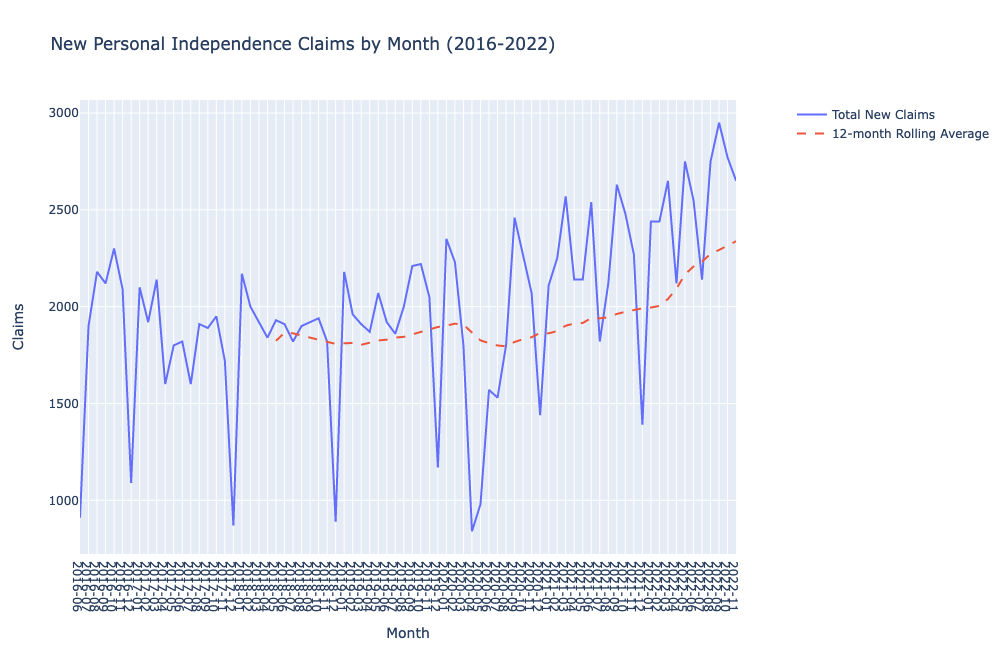

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df_pip['Year Month'], 
               y=df_pip['Total New Claims Registered'], 
               name="Total New Claims"),secondary_y=False)


fig.add_trace(
    go.Scatter(x=df_pip['Year Month'], 
               y=df_pip['Total New Claims 24-month Rolling Average'], 
               name="12-month Rolling Average", line=dict(dash='dash')),secondary_y=False,
)

fig.update_layout(
    title_text="New Personal Independence Claims by Month (2016-2022)",
    height=650
)

fig.update_xaxes(dict(title_text='Month', type='category', tickmode='linear', tick0=1, dtick=1))

fig.update_yaxes(title_text="Claims", secondary_y=False)

fig.show()

In [22]:
refined_death_injection_df = pd.read_pickle(f'data/outbound/AllDeathsInjections.pkl')
refined_death_injection_df['Year Month'] = refined_death_injection_df['Week_end_Date'].str[:7]

df_index_of_latest_registration_week_per_month = refined_death_injection_df.groupby(['Year Month'])['Registration_Week'].transform(max) == refined_death_injection_df['Registration_Week']
df_latest_registration_week_per_month_only = refined_death_injection_df[df_index_of_latest_registration_week_per_month].copy()


df_latest_registration_week_per_month_only['Cumulative Injections Zeroed'] = df_latest_registration_week_per_month_only['Cumulative Injections'].fillna(0).astype(int)

debug(df_latest_registration_week_per_month_only['Cumulative Injections Zeroed'])


4            0
17           0
32           0
44           0
59           0
71           0
83           0
98           0
110          0
122      13109
137     243276
149     574660
5       907814
21     1441147
33     1781283
45     2057231
60     2313274
72     2484399
84     2544808
99     2715632
111    3116308
126    3595627
138    3690264
150    3728791
6      3751913
22     3816800
34     3917413
46     3940126
61     3957589
73     3964389
88     3968165
100    3969677
112    3970393
127    3970802
139    3971226
151    3971485
7      3971720
Name: Cumulative Injections Zeroed, dtype: int64


In [23]:
df_pip_and_injections = pd.merge(df_pip, df_latest_registration_week_per_month_only, how='left', on = 'Year Month')
debug(df_pip_and_injections)
#df_pip_and_injections.columns
#df_pip_and_injections.info()

,Month,Normal Rules New Claims,Normal Rules Reassessment,Normal Rules Total,SREL New Claims,SREL Reassessment,SREL Total,Total Claims Registered,Total New Claims Registered,Year Month,...,2021,2022,2023,2016_to_2020_Mean,2017_to_2021_Mean,2018_to_2022_Mean,2016_to_2019_and_2021_Mean,Cumulative Deaths,Registration Year Week,Cumulative Injections Zeroed
0,2016-06-30,900,100,990,10,0,20,1010,910,2016-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-31,1880,1300,3180,20,10,40,3220,1900,2016-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-08-31,2140,1490,3630,40,20,60,3700,2180,2016-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-09-30,2090,1830,3920,30,20,50,3980,2120,2016-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-10-31,2280,2090,4370,20,10,40,4400,2300,2016-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2022-07-31,2120,350,2470,20,0,30,2500,2140,2022-07,...,293.0,351.0,0.0,281.8,280.8,293.6,285.8,19210.0,2022W30,3957589.0
74,2022-08-31,2710,410,3120,40,0,50,3170,2750,2022-08,...,299.0,315.0,0.0,269.8,269.4,278.2,269.0,22971.0,2022W34,3964389.0
75,2022-09-30,2910,390,3300,40,0,40,3340,2950,2022-09,...,380.0,299.0,0.0,294.4,315.4,318.8,304.8,27781.0,2022W39,3968165.0
76,2022-10-31,2740,390,3130,30,0,40,3170,2770,2022-10,...,320.0,339.0,0.0,302.4,312.0,316.2,292.8,31755.0,2022W43,3969677.0


In [36]:
#df_pip_and_injections['New Claims & Injections Rolling 12-month Correlation'] = df_pip_and_injections['Cumulative Total New Claims Registered'].rolling(12).corr(df_pip_and_injections['Cumulative Injections Zeroed'])
#df_pip_and_injections


df_pip_and_injections['New Claims & Injections Rolling 12-month Correlation'] = df_pip_and_injections['Total New Claims Registered'].rolling(12).corr(df_pip_and_injections['Cumulative Injections Zeroed'])
debug(df_pip_and_injections)
df_pip_and_injections.to_pickle(f'data/outbound/disabilities/MonthlyDisabilityRegistrationsAndInjectionsNov2022.pkl')

,Month,Normal Rules New Claims,Normal Rules Reassessment,Normal Rules Total,SREL New Claims,SREL Reassessment,SREL Total,Total Claims Registered,Total New Claims Registered,Year Month,...,2022,2023,2016_to_2020_Mean,2017_to_2021_Mean,2018_to_2022_Mean,2016_to_2019_and_2021_Mean,Cumulative Deaths,Registration Year Week,Cumulative Injections Zeroed,New Claims & Injections Rolling 12-month Correlation
0,2016-06-30,900,100,990,10,0,20,1010,910,2016-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-31,1880,1300,3180,20,10,40,3220,1900,2016-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-08-31,2140,1490,3630,40,20,60,3700,2180,2016-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-09-30,2090,1830,3920,30,20,50,3980,2120,2016-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-10-31,2280,2090,4370,20,10,40,4400,2300,2016-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2022-07-31,2120,350,2470,20,0,30,2500,2140,2022-07,...,351.0,0.0,281.8,280.8,293.6,285.8,19210.0,2022W30,3957589.0,-0.004925
74,2022-08-31,2710,410,3120,40,0,50,3170,2750,2022-08,...,315.0,0.0,269.8,269.4,278.2,269.0,22971.0,2022W34,3964389.0,-0.034427
75,2022-09-30,2910,390,3300,40,0,40,3340,2950,2022-09,...,299.0,0.0,294.4,315.4,318.8,304.8,27781.0,2022W39,3968165.0,0.214300
76,2022-10-31,2740,390,3130,30,0,40,3170,2770,2022-10,...,339.0,0.0,302.4,312.0,316.2,292.8,31755.0,2022W43,3969677.0,0.449220


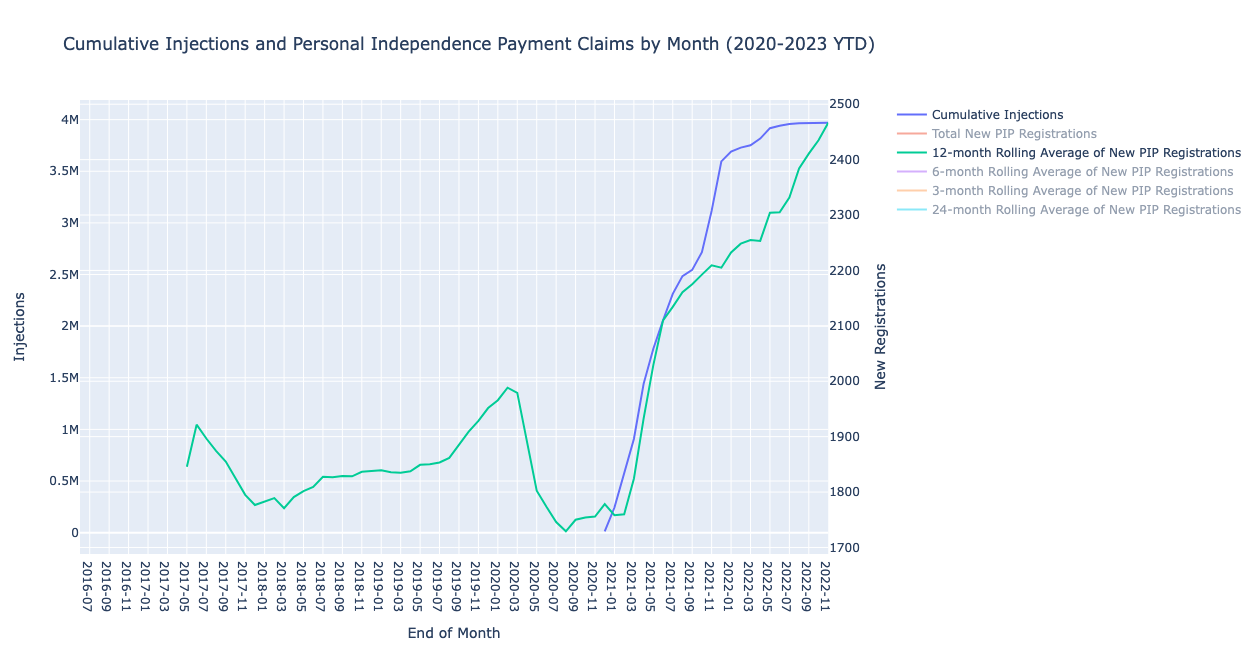

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df_pip_and_injections['Year Month'], 
               y=df_pip_and_injections['Cumulative Injections'], 
               name="Cumulative Injections"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_pip_and_injections['Year Month'], 
               y=df_pip_and_injections['Total New Claims Registered'], 
               name="Total New PIP Registrations", visible='legendonly'),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=df_pip_and_injections['Year Month'], 
               y=df_pip_and_injections['Total New Claims 12-month Rolling Average'], 
               name="12-month Rolling Average of New PIP Registrations"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=df_pip_and_injections['Year Month'], 
               y=df_pip_and_injections['Total New Claims Registered'].rolling(6).mean(), 
               name="6-month Rolling Average of New PIP Registrations", visible='legendonly'),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=df_pip_and_injections['Year Month'], 
               y=df_pip_and_injections['Total New Claims Registered'].rolling(3).mean(), 
               name="3-month Rolling Average of New PIP Registrations", visible='legendonly'),
    secondary_y=True,
)


fig.add_trace(
    go.Scatter(x=df_pip_and_injections['Year Month'], 
               y=df_pip_and_injections['Total New Claims Registered'].rolling(24).mean(), 
               name="24-month Rolling Average of New PIP Registrations", visible='legendonly'),
    secondary_y=True,
)


# Add figure title
fig.update_layout(
    title_text="Cumulative Injections and Personal Independence Payment Claims by Month (2020-2023 YTD)",
    height=650
)

# Set x-axis title
fig.update_xaxes(dict(title_text='End of Month', type='category', tickmode='linear', tick0=1, dtick=2))

# Set y-axes titles
fig.update_yaxes(title_text="Injections", secondary_y=False)
fig.update_yaxes(title_text="New Registrations", secondary_y=True) #<b>secondary</b>

fig.show()

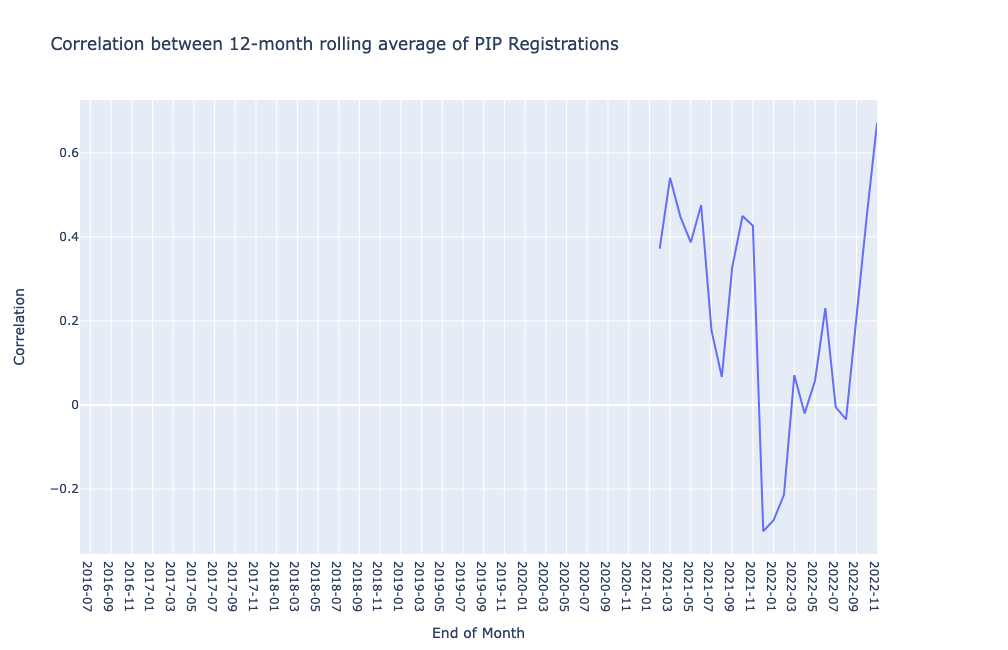

In [127]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df_pip_and_injections['Year Month'], 
               y=df_pip_and_injections['New Claims & Injections Rolling 12-month Correlation'], 
               name="New Claims & Injections Rolling 12-month Correlation"),secondary_y=False, #marker.color='red' || name="Weekly Deaths", marker_color='gray', opacity=0.7)
)



# Add figure title
fig.update_layout(
    title_text="Correlation between 12-month rolling average of PIP Registrations",
    height=650
)



# layout = go.Layout(
#     height=600,
#     margin=dict(l=50, r=50, b=50, t=50, pad=4),
#     title=dict(text=f'Weekly Deaths 2020-2023 (up to Week {analysis_end_week_selected}) by Date of Registration versus {mean_value_selected}'),
#     xaxis=dict(title_text='Registration Week', type='category', tickmode='linear', tick0=1, dtick=1),
#     yaxis=dict(title_text='Deaths'),
#     legend=dict(
#         orientation="h",
#         yanchor="bottom",
#         y=-0.4,
#         xanchor="left",
#         x=0.01
#     ),
# )

# fig_deaths_trends = go.Figure(data=fig_deaths_trends.data, layout=layout)



# Set x-axis title
fig.update_xaxes(dict(title_text='End of Month', type='category', tickmode='linear', tick0=1, dtick=2))
#fig.update_xaxes(title_text="End of Month")

# Set y-axes titles
fig.update_yaxes(title_text="Correlation", secondary_y=False)
#fig.update_yaxes(title_text="New Registrations", secondary_y=True) #<b>secondary</b>

#fig.update_yaxes(range=[50, 650], secondary_y=False)

# if show_total_cumulative_injections:
#     fig.update_yaxes(range=[0, 4100000], secondary_y=True)
# else:
#     fig.update_yaxes(range=[0, 2000000], secondary_y=True)
        
#fig.update_xaxes(range=[3, 9])

fig.show()